## k-modes --> hem katogerik hem nümerik verileri sınıfkandırmada kullanılır
## k-means ise sadece nümerik verileri sınıflandırır

In [32]:
import pandas as pd
import numpy as np

In [33]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [34]:
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [35]:
df = pd.read_csv('segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


##Sex Marital status Education Occupation	Settlement size
 --> kategprik veriyken  ||  age , income nümerik veri

In [36]:
## null data var mı
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [37]:
## null datamız yokmuş

In [38]:
## nümerik verileri kategorize edicem

In [39]:
df_temp = df[['ID','Age','Income']]

In [40]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])


In [41]:
df = df.drop(['ID'],axis=1)
## analizde kullanılmayacağı için drop ettim

In [42]:
## kmodes nümerik verileri float a çevirmemizi istiyo. çevirdim:

In [43]:
mark_array = df.values
mark_array[:,2] = mark_array[:,2].astype(float)
mark_array[:,4] = mark_array[:,4].astype(float)

In [45]:
df.head()
## verilerin normalize edilmiş hali:

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [48]:
## modeli oluşturmak
kproto = KPrototypes(n_clusters = 10 , verbose = 2 , max_iter = 20)
clusters = kproto.fit_predict(mark_array , categorical = [0,1,3,5,6])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 690, ncost: 190.89596006661407
Run: 1, iteration: 2/20, moves: 163, ncost: 185.843034566391
Run: 1, iteration: 3/20, moves: 285, ncost: 167.14783823663296
Run: 1, iteration: 4/20, moves: 111, ncost: 166.56135914786447
Run: 1, iteration: 5/20, moves: 39, ncost: 166.43917032285233
Run: 1, iteration: 6/20, moves: 33, ncost: 166.2745349767831
Run: 1, iteration: 7/20, moves: 29, ncost: 166.21337614209835
Run: 1, iteration: 8/20, moves: 15, ncost: 166.204492057819
Run: 1, iteration: 9/20, moves: 9, ncost: 166.19008856981895
Run: 1, iteration: 10/20, moves: 20, ncost: 166.15842719115656
Run: 1, iteration: 11/20, moves: 23, ncost: 166.1278823914295
Run: 1, iteration: 12/20, moves: 11, ncost: 166.1206492344524
Run: 1, iteration: 13/20, moves: 10, ncost: 166.1115982433658
Run: 1, iteration: 14/20, moves: 12, nc

## verbose parametresinin değerini değiştirmek, algoritmanın performansını, hesaplama sürecini veya çıktısını etkilemez. verbose değeri sadece eğitim sırasında ekran çıktısının detay seviyesini değiştirir.

In [49]:
print(kproto.cluster_centroids_) ##kümelerin merkezlerini ekrana yazdırır. nümerik veriler için: Bu özelliklerin ortalama değerini gösterir.
##Kategorik veriler için: En sık rastlanan (mod) kategorik değerleri gösterir.

len(kproto.cluster_centroids_) ##kaç küme oluşturulduğunu döndürür. (bu kod için 10 kümeymiş)

[[0.38444266 0.26986576 0.         0.         1.         1.
  0.        ]
 [0.23787089 0.18795175 1.         1.         1.         0.
  0.        ]
 [0.16983081 0.28356739 1.         1.         1.         1.
  0.        ]
 [0.28443175 0.43889531 0.         1.         1.         2.
  2.        ]
 [0.15898688 0.16265716 0.         0.         0.         0.
  0.        ]
 [0.17624521 0.36313595 0.         0.         0.         1.
  2.        ]
 [0.42170473 0.37920641 0.         0.         1.         1.
  1.        ]
 [0.74066686 0.35325759 0.         0.         2.         0.
  0.        ]
 [0.16403709 0.32203681 1.         1.         1.         1.
  1.        ]
 [0.62279831 0.46191834 1.         1.         2.         1.
  1.        ]]


10

In [51]:
cluster_dict = []
for c in clusters:
    cluster_dict.append(c)
    
df['cluster'] = cluster_dict

## orijinal verilerimizdeki çıkardığım sütunlerı geri koyuyorum:
df[['ID','Age','Income',]] = df_temp

In [52]:
df[df['cluster']== 0 ].head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
2,0,0,49,1,89210,0,0,0,100000003
5,0,0,35,1,144848,0,0,0,100000006
16,0,0,53,1,125550,1,0,0,100000017
22,0,0,48,1,89804,0,0,0,100000023
42,0,0,44,1,133658,0,0,0,100000043


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


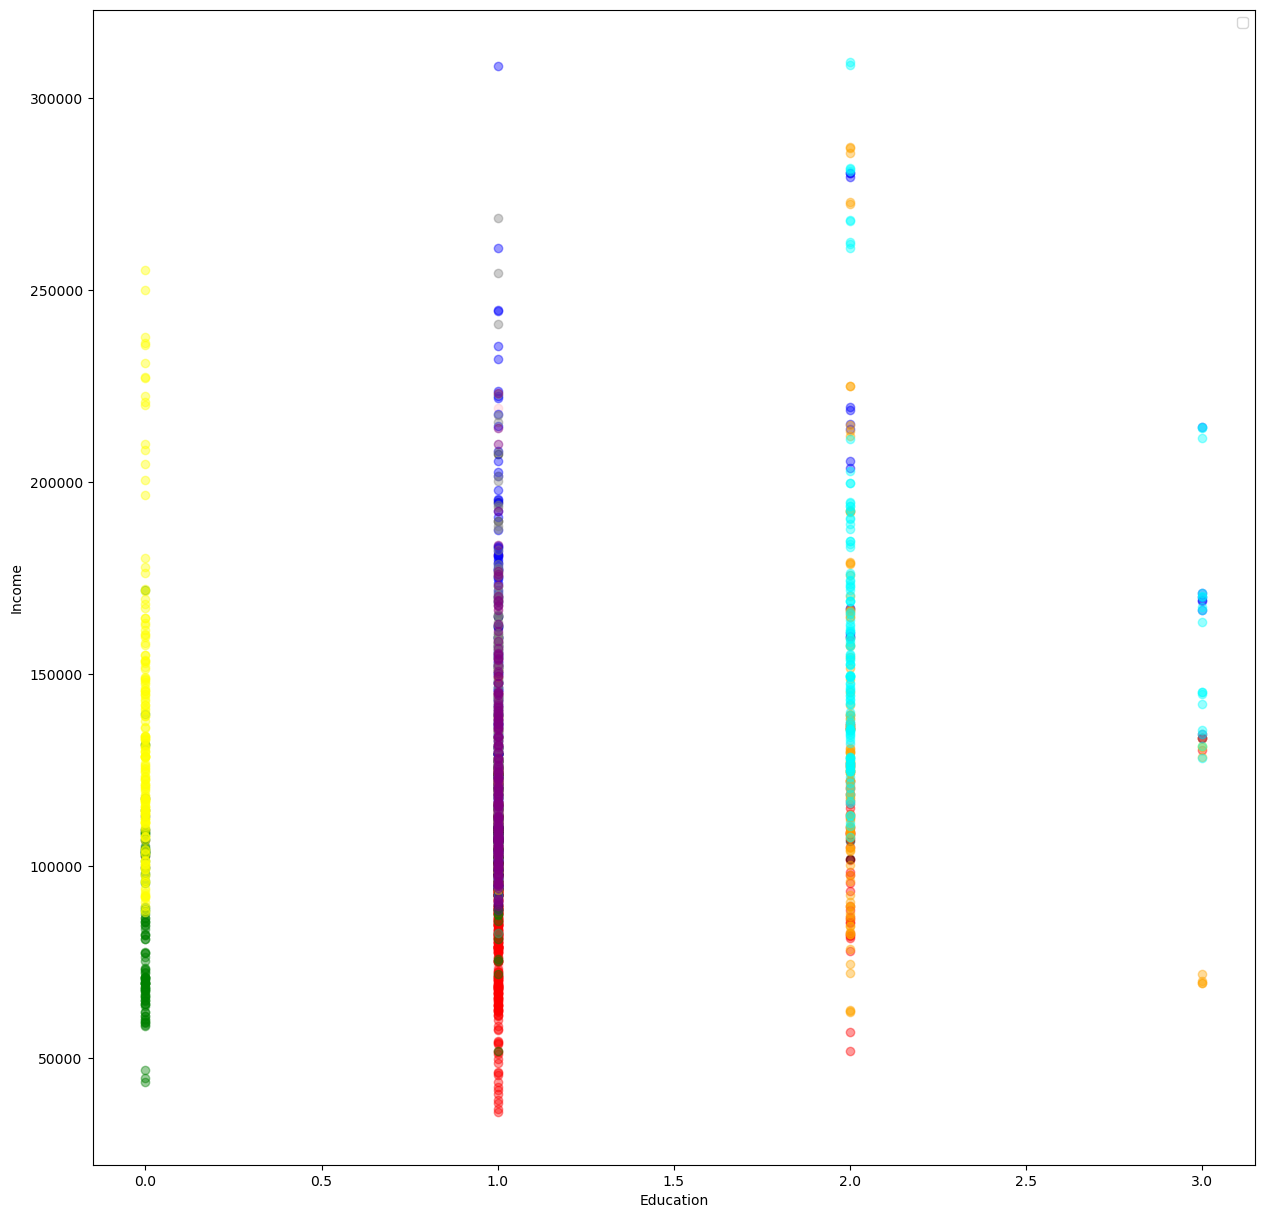

In [57]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
df7 = df[df.cluster==6]
df8 = df[df.cluster==7]
df9 = df[df.cluster==8]
df10 = df[df.cluster==9]

plt.figure(figsize=(15,15))
plt.xlabel('Education')
plt.ylabel('Income')

plt.scatter(df1.Education , df1['Income'],color='pink', alpha = 0.4)
plt.scatter(df2.Education , df2['Income'],color='red', alpha = 0.4)
plt.scatter(df3.Education , df3['Income'],color='black', alpha = 0.4)
plt.scatter(df4.Education , df4['Income'],color='blue', alpha = 0.4)
plt.scatter(df5.Education , df5['Income'],color='green', alpha = 0.4)
plt.scatter(df6.Education , df6['Income'],color='yellow', alpha = 0.4)
plt.scatter(df7.Education , df7['Income'],color='gray', alpha = 0.4)
plt.scatter(df8.Education , df8['Income'],color='orange', alpha = 0.4)
plt.scatter(df9.Education , df9['Income'],color='purple', alpha = 0.4)
plt.scatter(df10.Education , df10['Income'],color='cyan', alpha = 0.4)

plt.legend()
plt.show()

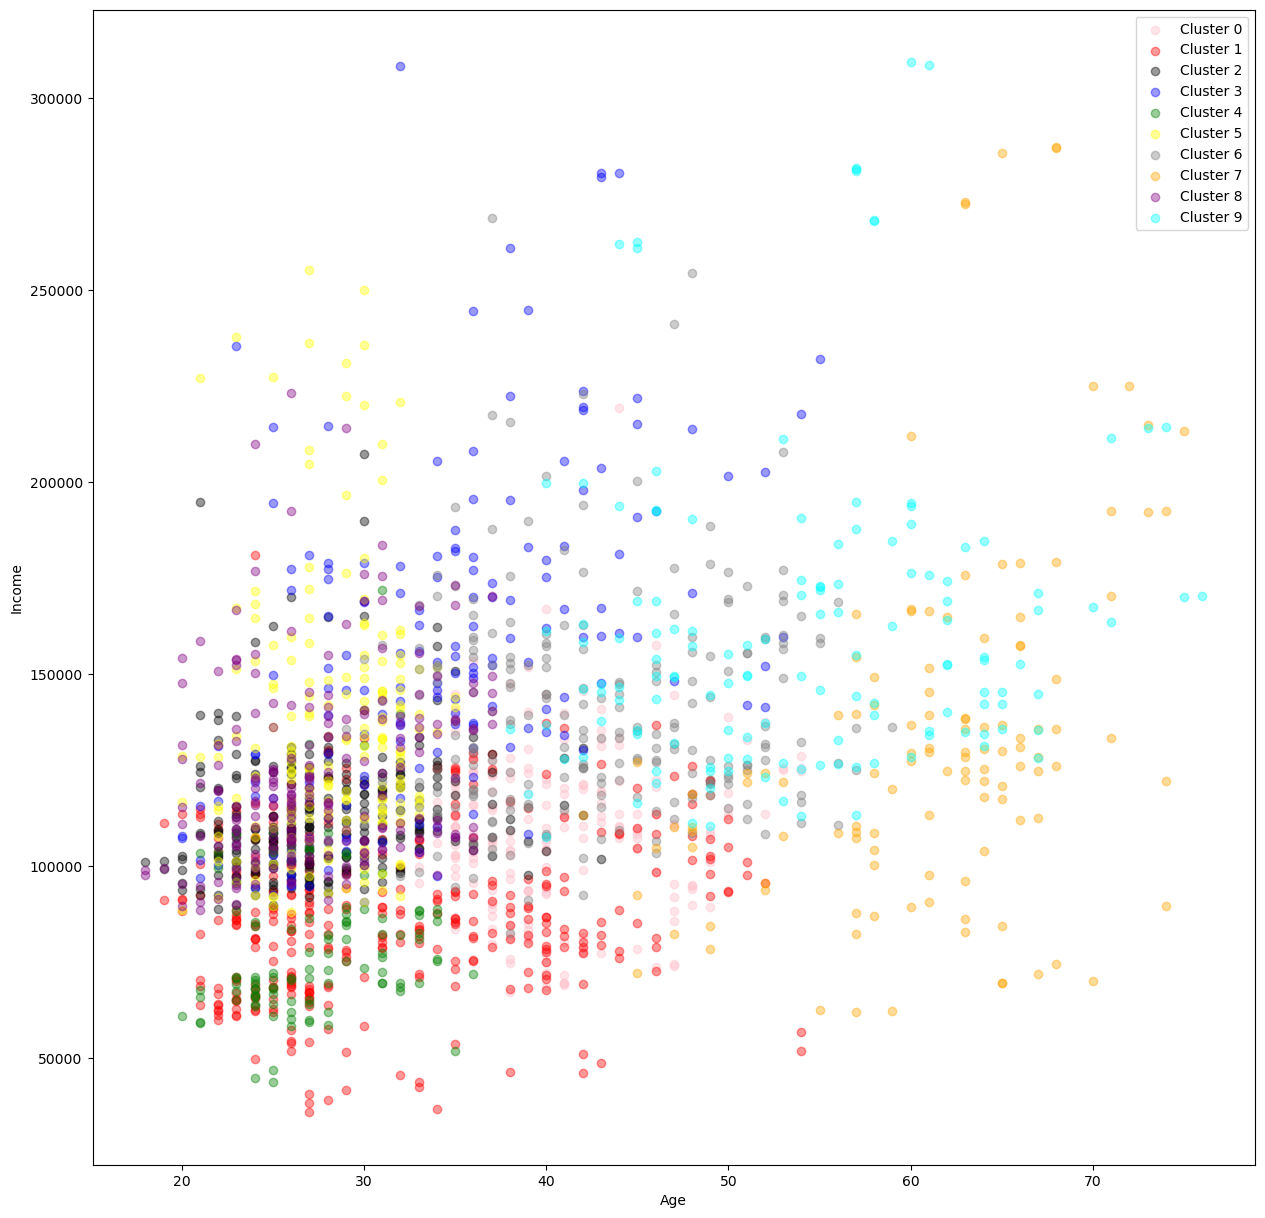

In [59]:
clusters = range(10)
colors = ['pink', 'red', 'black', 'blue', 'green', 'yellow', 'gray', 'orange', 'purple', 'cyan']

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

for cluster, color in zip(clusters, colors):
    df_cluster = df[df.cluster == cluster]
    plt.scatter(df_cluster.Age, df_cluster['Income'], color=color, alpha=0.4, label=f'Cluster {cluster}')

plt.legend()
plt.show()
